In [129]:
# !pip install cpbd
# !pip install imread
# !pip install hvplot
# !pip install scipy==1.1.0
# !pip install brisque 
# !pip install Image

In [36]:
import cpbd
from scipy import ndimage
import numpy as np
import pandas as pd
from PIL import Image
import sys
import cv2
from brisque import BRISQUE
import matplotlib.pyplot as plt
from PIL import GifImagePlugin
import IPython
from IPython.display import Image

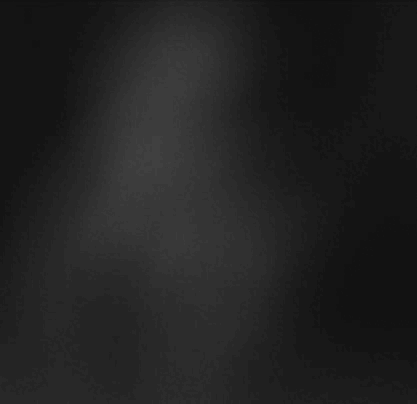

In [40]:
Image(filename='medved.gif')

In [37]:
input_image = ndimage.imread("medved.gif", mode='L')

/home/orogov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  """Entry point for launching an IPython kernel.


In [4]:
input_image.shape

(404, 417)

In [5]:
def gif2jpg(file_name: str, num_key_frames: int, trans_color: tuple):
    """
    convert gif to `num_key_frames` images with jpg format
    :param file_name: gif file name
    :param num_key_frames: result images number
    :param trans_color: set converted transparent color in jpg image
    :return:
    """
    with Image.open(file_name) as im:
        for i in range(num_key_frames):
            im.seek(im.n_frames // num_key_frames * i)
            image = im.convert("RGBA")
            datas = image.getdata()
            newData = []
            for item in datas:
                if item[3] == 0:  # if transparent
                    newData.append(trans_color)  # set transparent color in jpg
                else:
                    newData.append(tuple(item[:3]))
            image = Image.new("RGB", im.size)
            image.getdata()
            image.putdata(newData)
            image.save('{}.jpg'.format(i))


gif2jpg("medved.gif", 30, (256, 256, 256))  # convert image.gif to 20 jpg images with white background

In [6]:
names = []
for j in np.arange(0,30):
    names.append(str(j) + '.jpg')

In [28]:
obj = BRISQUE(url=False)

sharpness_metric = []
brisque_metric = []
for i in names:
    
    input_image = ndimage.imread(i, mode='L')
    sharpness_metric.append(cpbd.compute(input_image))
    
    im = cv2.imread(i)
    brisque_metric.append(obj.score(im))

/home/orogov/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0.
Use ``matplotlib.pyplot.imread`` instead.
  import sys


In [10]:
columns = {
    'Sharpness': sharpness_metric,
    'Brisque' : brisque_metric
              }
df = pd.DataFrame(columns)

In [32]:
det = [24, 25, 26, 27, 28, 39, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 45.5, 45.5, 46, 46, 46.5, 46.5, 47, 47.5] #from YOLO
ind = [i for i in np.arange(1,31)]
len(ind)

30

In [17]:
df.insert(2, "Detection", list(reversed(det)), True)
df.insert(3, "Iteration", list(reversed(ind)), True)

In [18]:
# df.insert(3, "Detection Certainty", [24, 25, 26, 27, 28, 39, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 45.5, 45.5, 46, 46, 46.5, 46.5, 47, 47.5, 47.6, 47.7, 47.8], True)

In [34]:
df

,Sharpness,Brisque,Detection,Iteration
0,0.993068,82.015482,47.5,30
1,0.993123,79.470192,47.0,29
2,0.991146,81.183715,46.5,28
3,0.995037,78.743922,46.5,27
4,0.992790,79.734569,46.0,26
5,0.981920,80.165097,46.0,25
6,0.983424,78.677127,45.5,24
7,0.991253,81.727555,45.5,23
8,0.977262,80.808301,45.0,22
9,0.976956,79.259543,44.0,21


In [35]:
from altair import Chart
import altair as alt
import seaborn as sns
c = Chart(df)

c.mark_circle().encode(
    alt.X('Detection',
        scale=alt.Scale(zero=False),
        axis=alt.Axis(tickCount=df.shape[1], grid=False)
    ),
    # x='Detection',
    # y='Sharpness',
    alt.Y('Sharpness',
        scale=alt.Scale(zero=False),
        axis=alt.Axis(tickCount=df.shape[1],grid=False)
    ),
    # color='Brisque',
    color=alt.Color('Brisque', legend=alt.Legend(orient="right"), scale=alt.Scale(scheme='goldgreen')),
    size='Iteration',
).properties(
    width=700,
    height=350
)

alt.Chart(...)

In [42]:
# fig, ax1 = plt.subplots( figsize=(12,8)) 

# ax1.set_xlabel('Frames') 
# ax1.set_ylabel('Sharpness', color = 'red') 
# ax1.plot(sharpness_metric, "o", color = 'red') 
# ax1.tick_params(axis ='y', labelcolor = 'red') 
# # ax1.set_ylim(0, 1)
# ax1.grid()
# # Adding Twin Axes

# ax2 = ax1.twinx() 
  
# ax2.set_ylabel('Brisque', color = 'blue') 
# ax2.plot(brisque_metric, "o", color = 'blue') 
# ax2.tick_params(axis ='y', labelcolor = 'blue') 
# # ax2.set_ylim(0, 80)